## Astr 501 Star_Explore Work

Utilize [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [50]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

#data_dir="/nugrid_data" 
data_dir="/data/nugrid_apod2/"

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 4 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [51]:
s=ms.star_log(mass=4,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


In [4]:
##Aside: Commands to get info on data

# help
# s?
#print s.cols
#s.data?
#np.se.dcols

## 9/18 Work

This is the HR diagram (Figure 8.1)

<IPython.core.display.Javascript object>


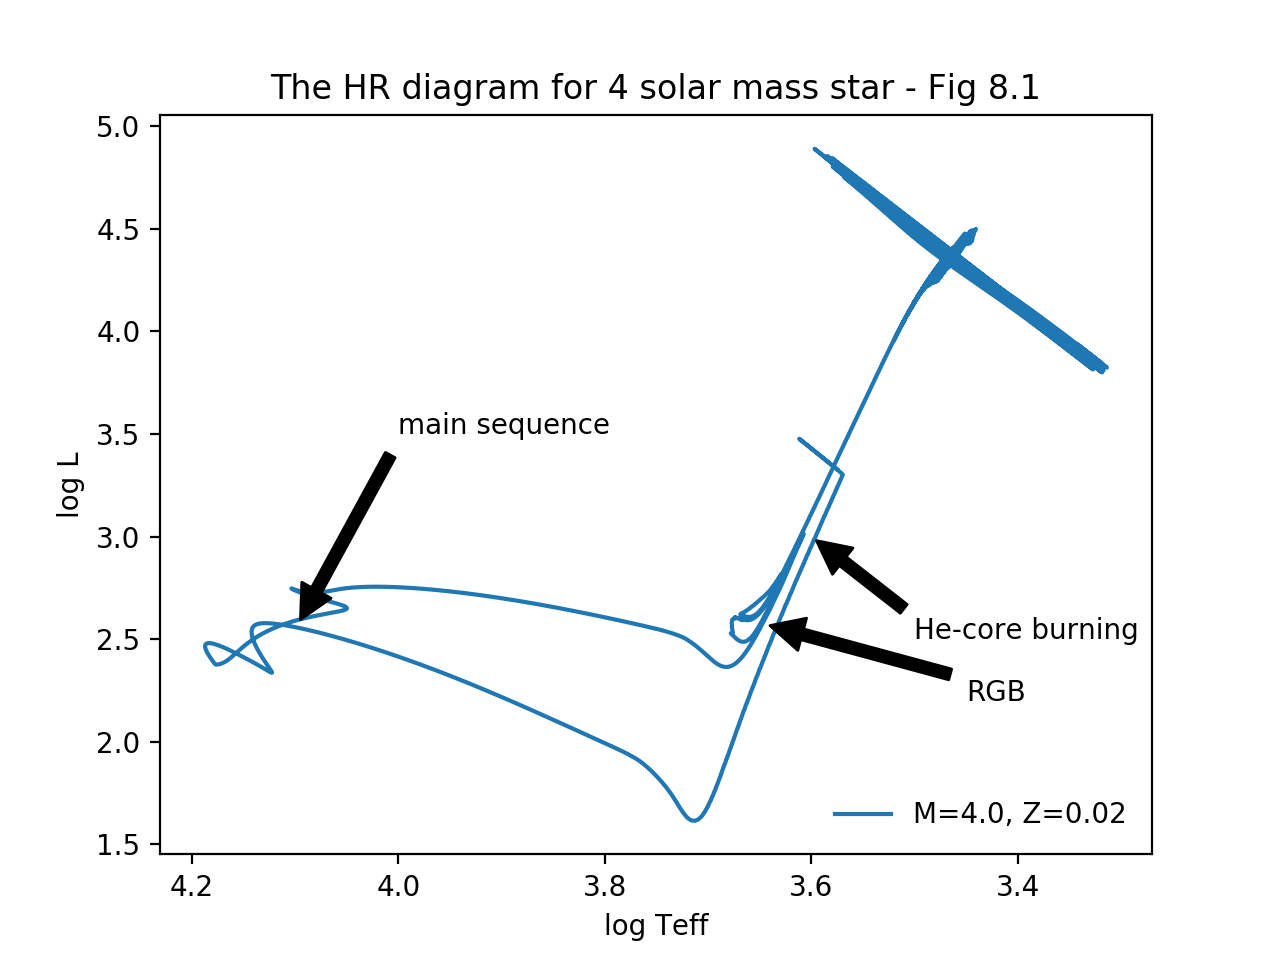

In [52]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)
annotate('He-core burning', xy=(3.6,3), xytext=(3.5, 2.5), arrowprops=dict(facecolor='black', shrink=0.05))
annotate('RGB', xy=(3.65,2.58), xytext=(3.45, 2.2), arrowprops=dict(facecolor='black', shrink=0.05))
annotate('main sequence', xy=(4.1,2.55), xytext=(4.0, 3.5), arrowprops=dict(facecolor='black', shrink=0.05))
title('The HR diagram for 4 solar mass star - Fig 8.1')

To create figure 8.2, we need to plot Log(R/Rsun) by Log (Teff), which is a similarly formated graph to figure 8.1 (The H-R diagram)

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# Log_Teff = s.get('log_Teff')
# Log_R = s.get('log_R')

<IPython.core.display.Javascript object>


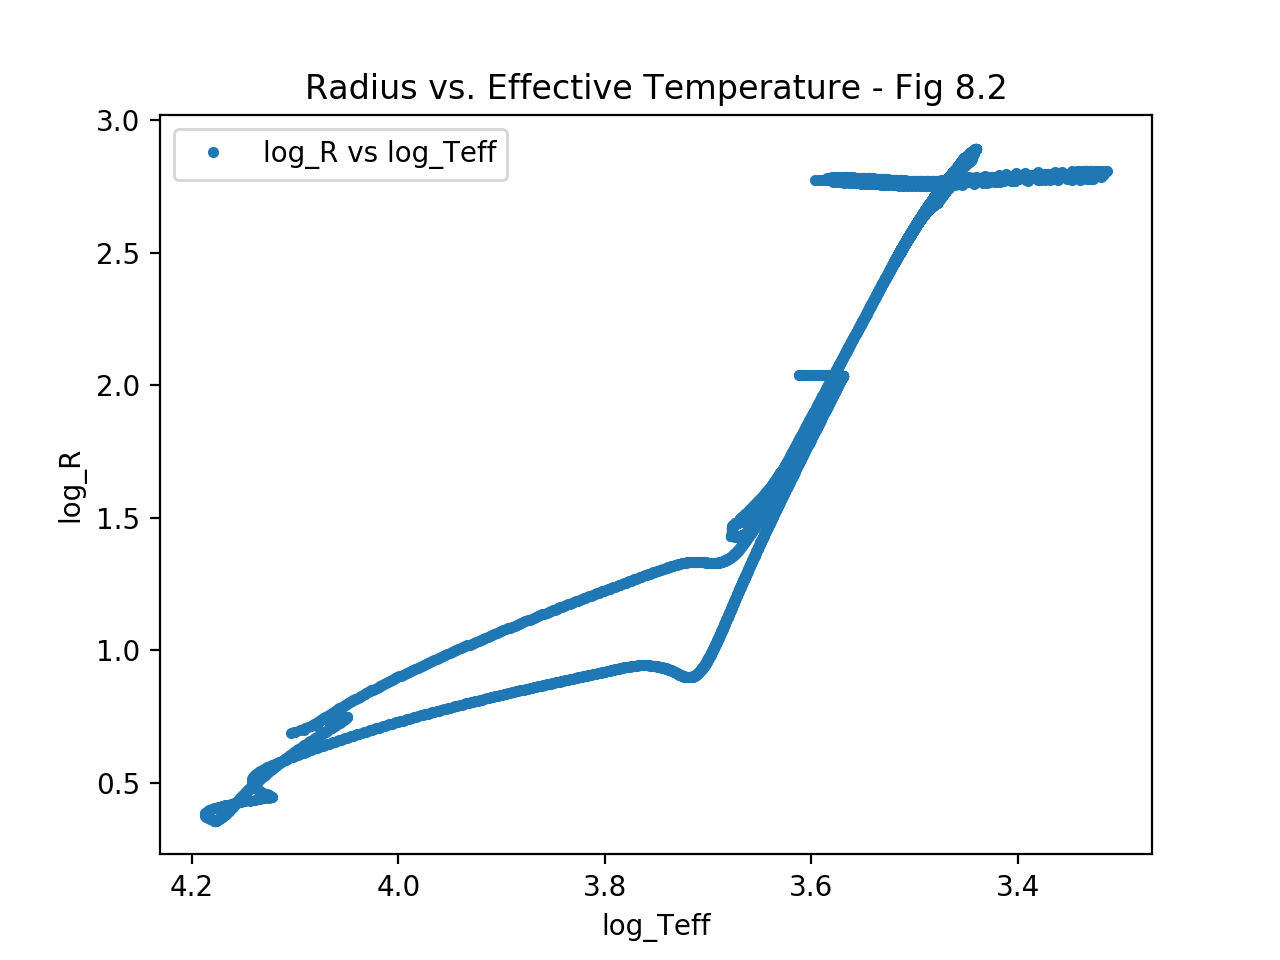

In [54]:
ifig=120;close(ifig);figure(ifig)
s.plot('log_Teff','log_R')
gca().invert_xaxis()
title('Radius vs. Effective Temperature - Fig 8.2')

<IPython.core.display.Javascript object>


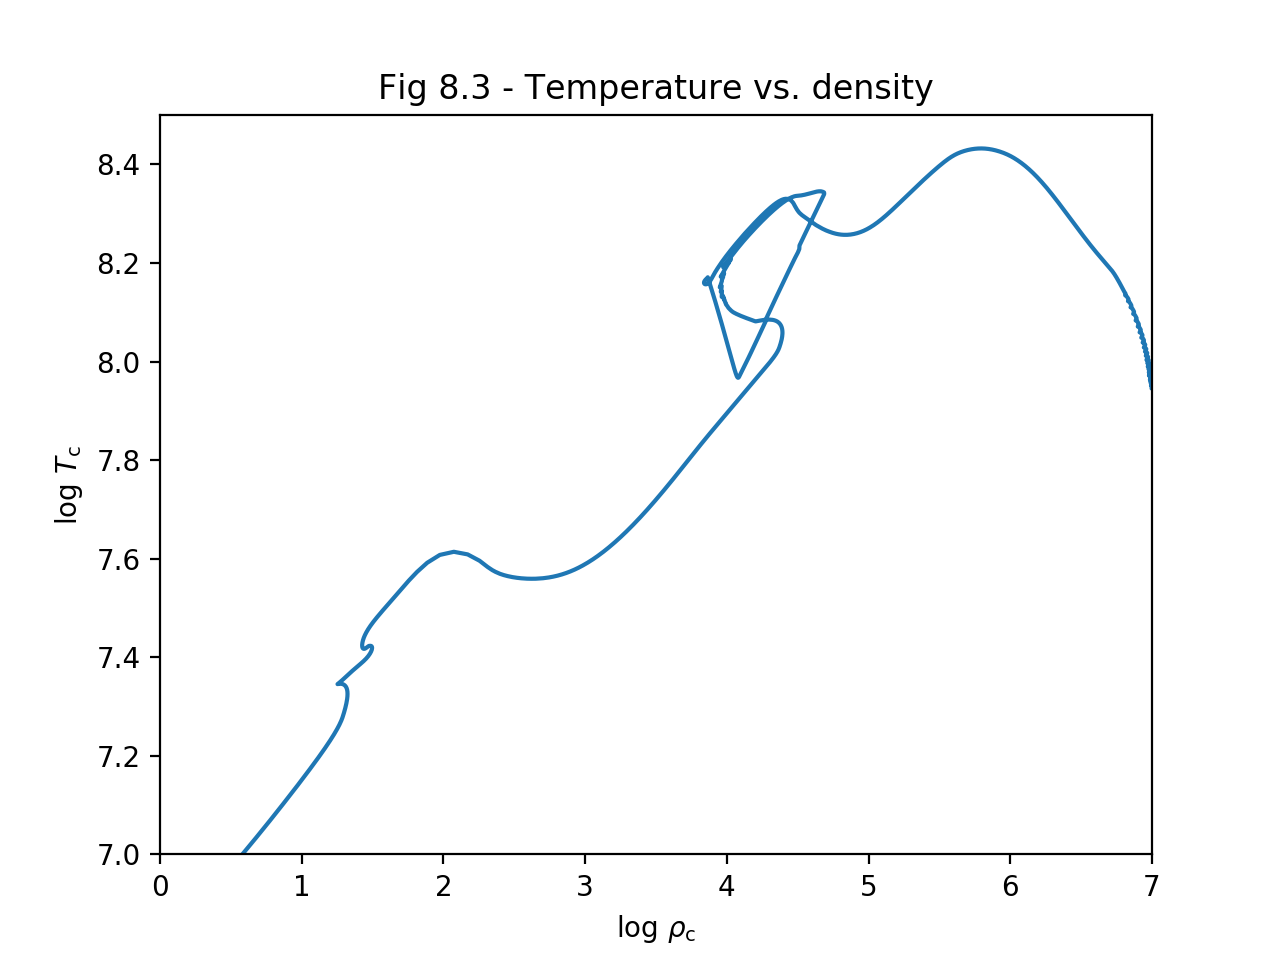

In [55]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])
title('Fig 8.3 - Temperature vs. density')

Now that we have an overview of the stellar evolution of this $4M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 4 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [56]:
pt=mp.se(mass=4,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


### Abundance profiles 

Let's figure out what model number is required for each stage in the star's life, by plotting T effective versus model number.

<IPython.core.display.Javascript object>


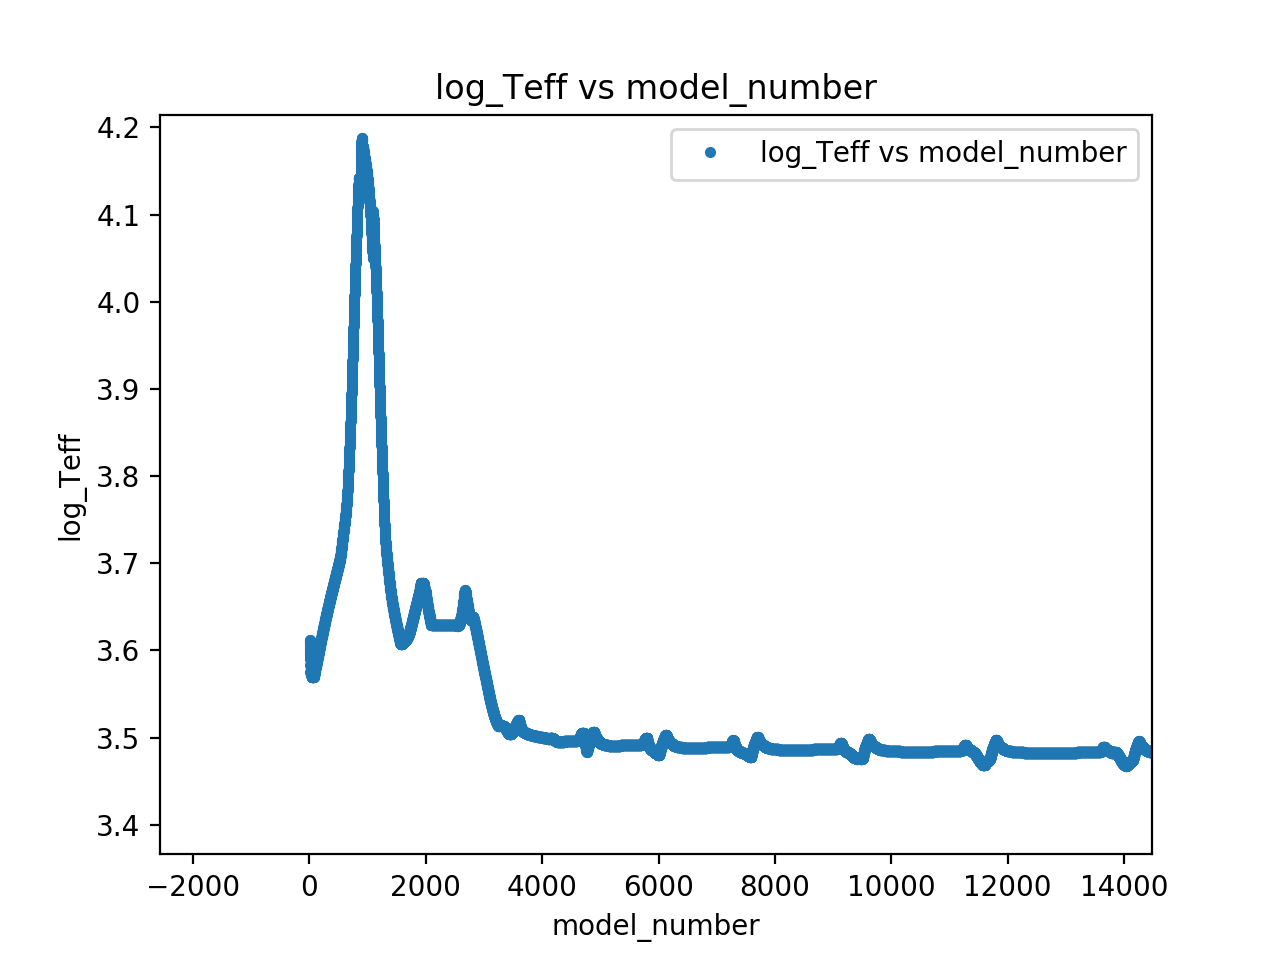

In [57]:
ifig=121;close(ifig);figure(ifig)
s.plot('model_number','log_Teff')

It looks like the star approaches the MS at a model number of 1100, the RGB at 1300, and the He-core burning stage at 1850

Let's make figure 8.3 - the Isotopic abundances

<IPython.core.display.Javascript object>


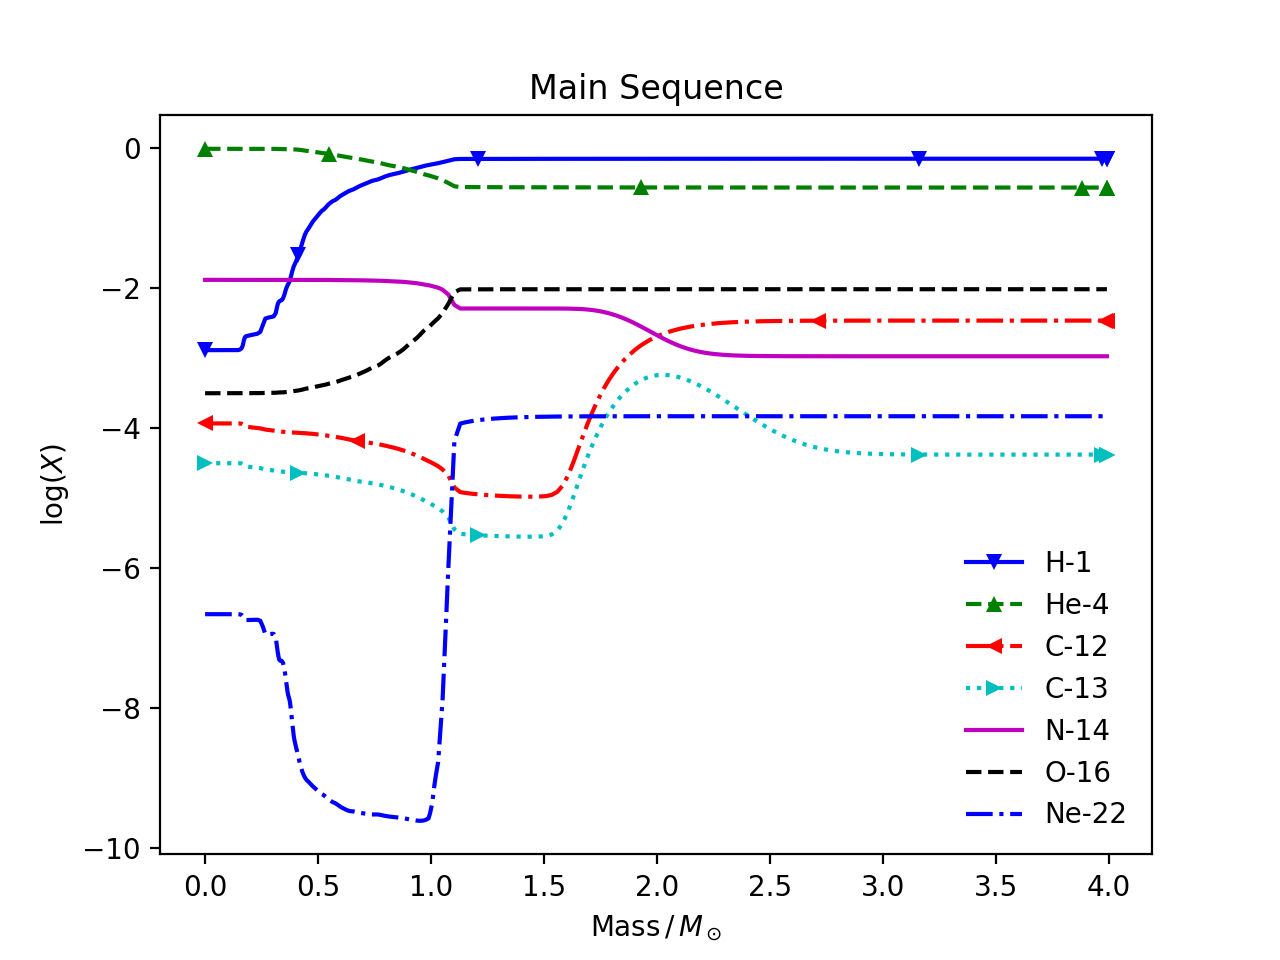

 reading ['iso_massf']...100%

In [58]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Ne-22']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1100, logy=True)
title("Main Sequence")
#ylim(-7,0)
#xlim(0.552,0.556)
# ylim(-7,0)
# xlim(0.78,0.825)

At RGB Hydrogen should occur on the decline of the peak after the star turns on the main sequence

<IPython.core.display.Javascript object>


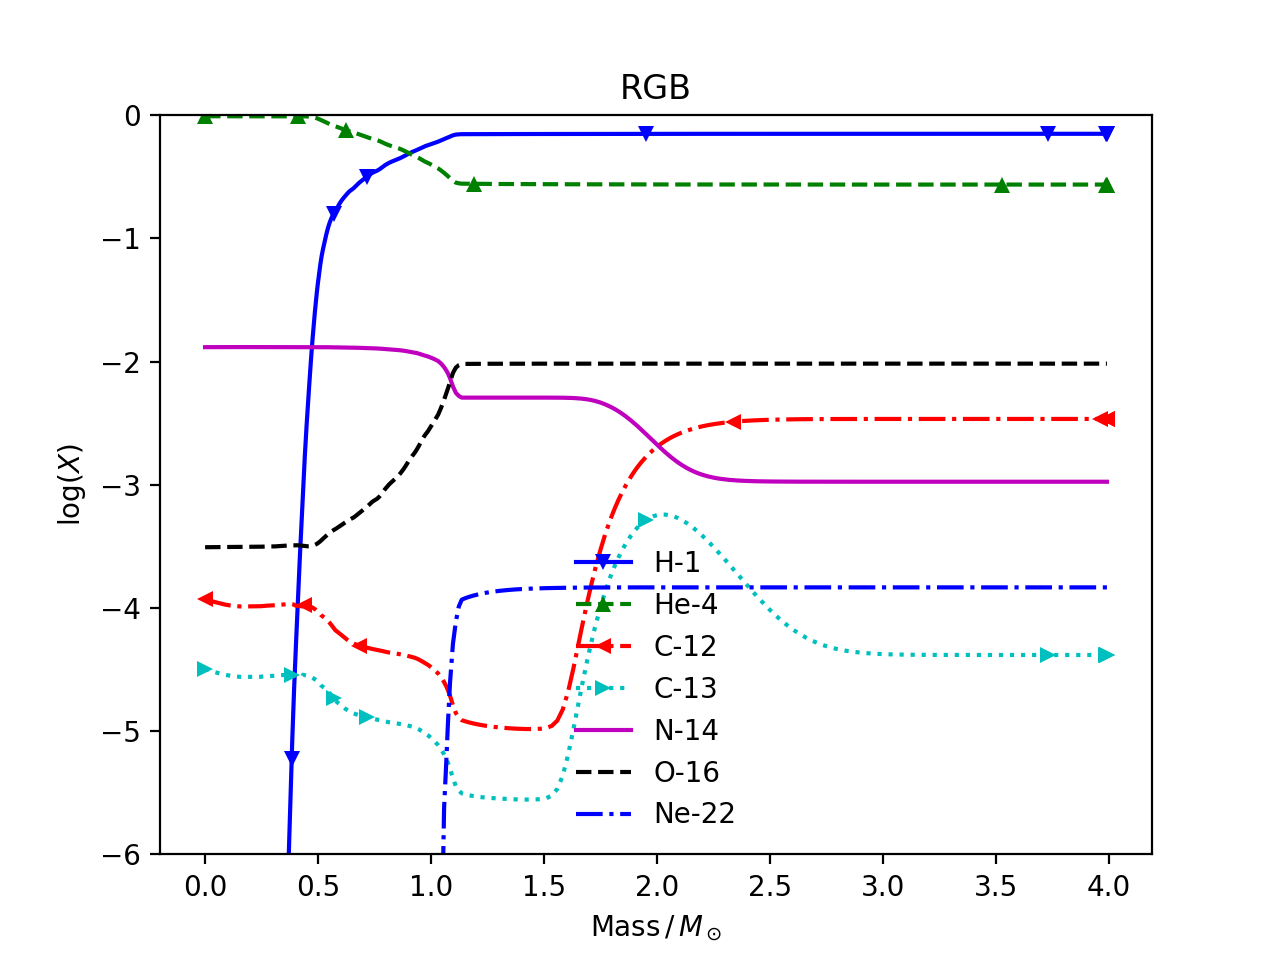

 reading ['iso_massf']...100%

In [59]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Ne-22']
ifig=109;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1300, logy=True)
ylim(-6,0)
#xlim(0.603,0.6033)
title("RGB")

The He Shell burning occurs at the second peak in temperature, when He fusion begins

<IPython.core.display.Javascript object>


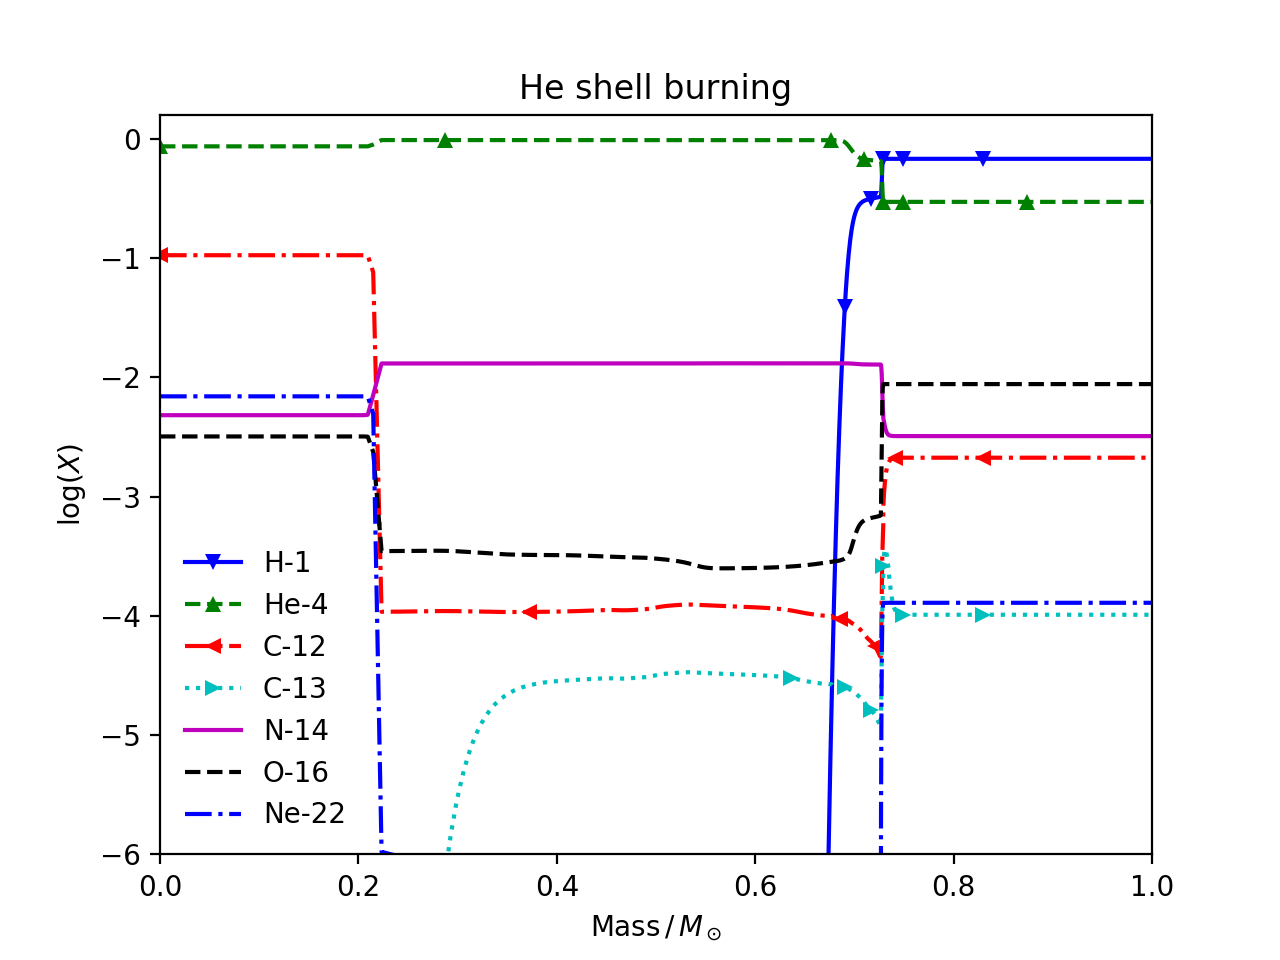

 reading ['iso_massf']...100%

In [60]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Ne-22']
ifig=110;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1850, logy=True)
ylim(-6,0.2)
xlim(0,1)
title("He shell burning")

## 9/20 HW

Plot the Pressure scale height for a star at the tip of the red giant branch.
For a 4 solar mass star, the very end of the red giant branch occurs at a model number ~1500

The pressure scale height is Hp = kT/gM where k is the boltzmann constant, T is temperature, M is mass, and g is the gravitational constant

In [96]:
#pt?
#thing = pt.get(model number, 'name')
#The model number is that for a star in the RGB
#print pt.se.dcols
mass = pt.get(1500, 'mass')*1.989*(10**30) #Mass in units kg
solarmass = pt.get(1500, 'mass') #Mass in units Solar mass
rho = pt.get(1500, 'rho') #Stellar density
temp = pt.get(1500, 'temperature')*(10**8) #Temp in units Kelvin, T8 in Kelvin
rad = pt.get(1500, 'radius')*(10**9) #radius in units m (Why temp and rad have these weird units, I'm unsure)
rad_km = pt.get(1500, 'radius')*(10**3)
rad_solar = rad_km/695700

 reading ['radius']...100%.100%

In [97]:
#This random cell is great for checking the scale of your variables
#print rad

In [98]:
#For the scale height we need to boltzmann constant!
k = 1.38064852*10**(-23) #m^2 kg s^-2 K-1
#M is th mean mass of a molecule (Hydrogen) in kg (1.6737236 × 10^-27 kg)
#Should this be Helium since we're at the tip of the RGB?

In [99]:
#Pressure as a function of scale height
def P(P0,z,M,T):
    return (P0)*e**(-(z)*M*9.8/((1.38064852*10**(-23))*(10**T)))
#Pressure scale height
def HP(T,M,g):
    return (k)*T/(M*g) #Where M is the mean molecular weight (in this case, the mass of a H atom in kg)
#Gravitational constant g
def g(m,r):
    return 6.67408*(10**-11)*m*(r**-2)

In [100]:
m_5star = 1.6737236*(10**-27) #for hydrogen, in kg. This may change
g_5star = g(mass,rad) #g needs to be in m/s^2
Scale_HeightP = HP(temp,m_5star,g_5star) #Unitless!

In [101]:
#Check your scale height values
#print Scale_HeightP

<IPython.core.display.Javascript object>


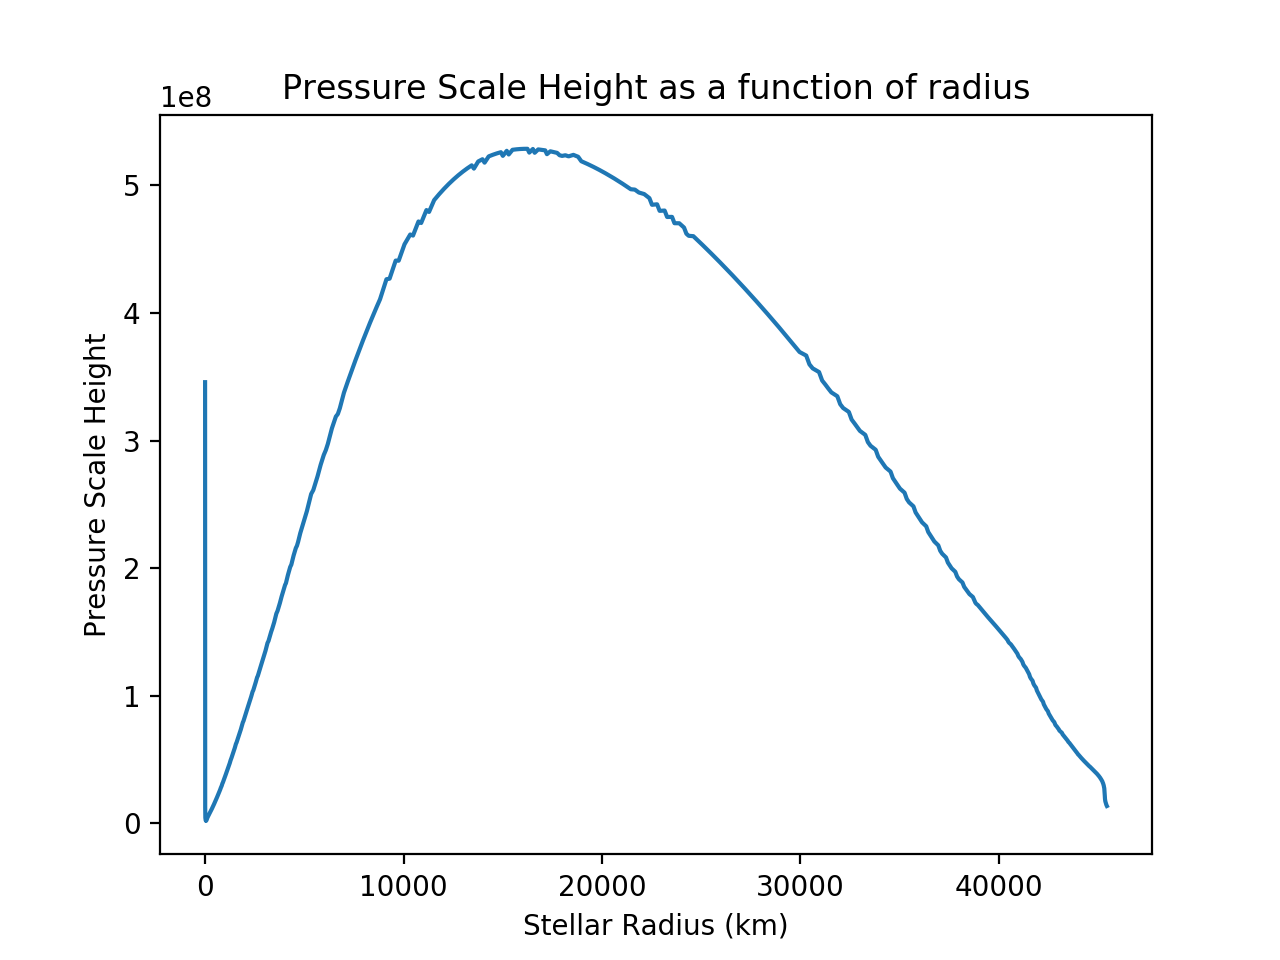

In [103]:
ifig=300;close(ifig);figure(ifig)
plt.plot(rad_km,Scale_HeightP)
plt.title('Pressure Scale Height as a function of radius')
plt.ylabel('Pressure Scale Height')
#plt.ylim((0,1.25*10**8))
plt.xlabel('Stellar Radius (km)')

We need to make plots of density v radius, density v mass, temp v radius, and temp v mass

<IPython.core.display.Javascript object>


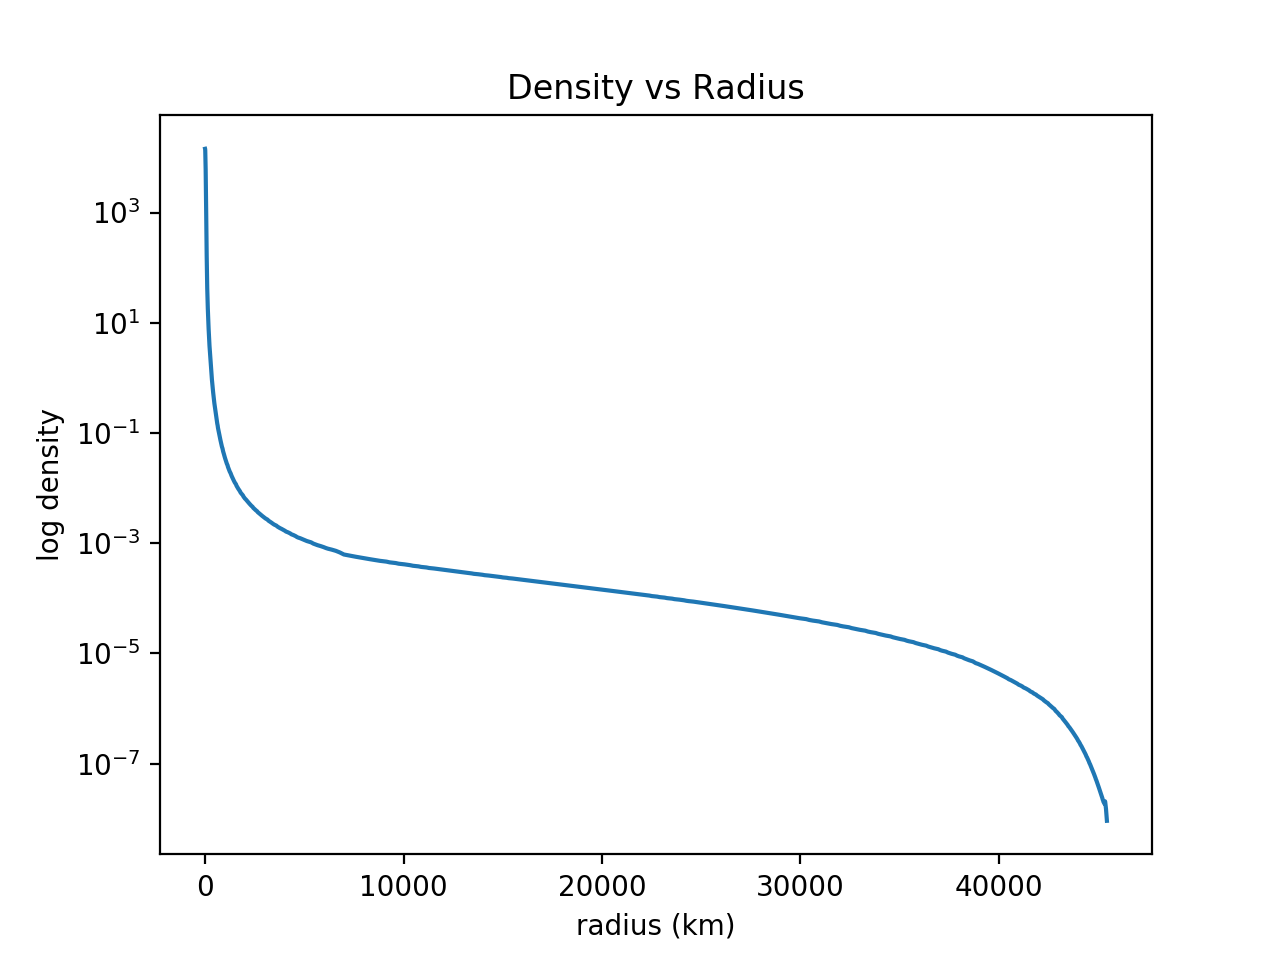

In [115]:
ifig=302;close(ifig);figure(ifig)
plt.plot(rad_km,rho)
plt.title('Density vs Radius')
plt.ylabel('log density')
plt.xlabel('radius (km)')
plt.yscale('log')
#plt.xscale('log')

<IPython.core.display.Javascript object>


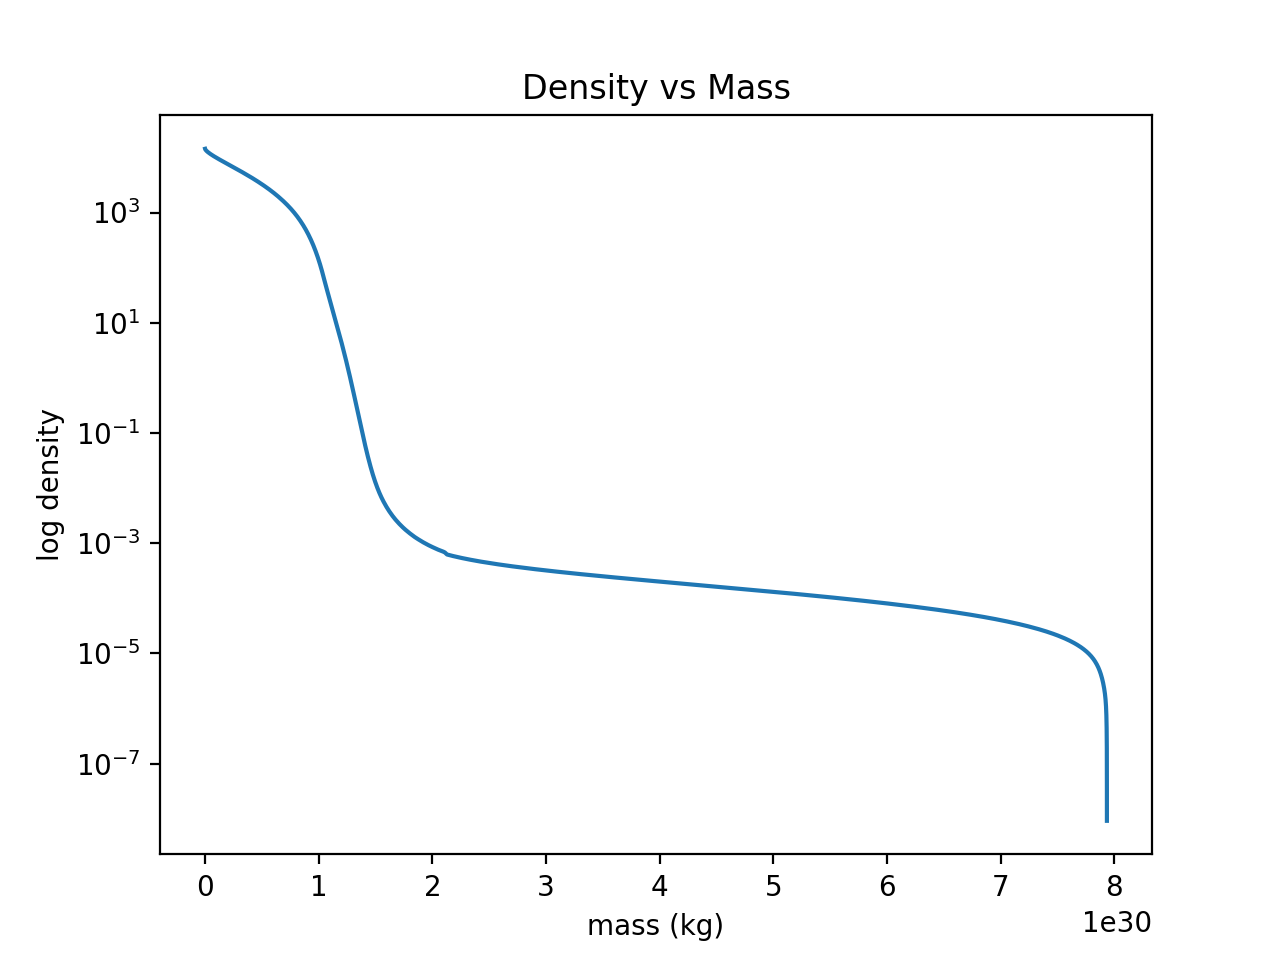

In [116]:
ifig=303;close(ifig);figure(ifig)
plt.plot(mass,rho)
plt.title('Density vs Mass')
plt.ylabel('log density')
plt.xlabel('mass (kg)')
plt.yscale('log')

<IPython.core.display.Javascript object>


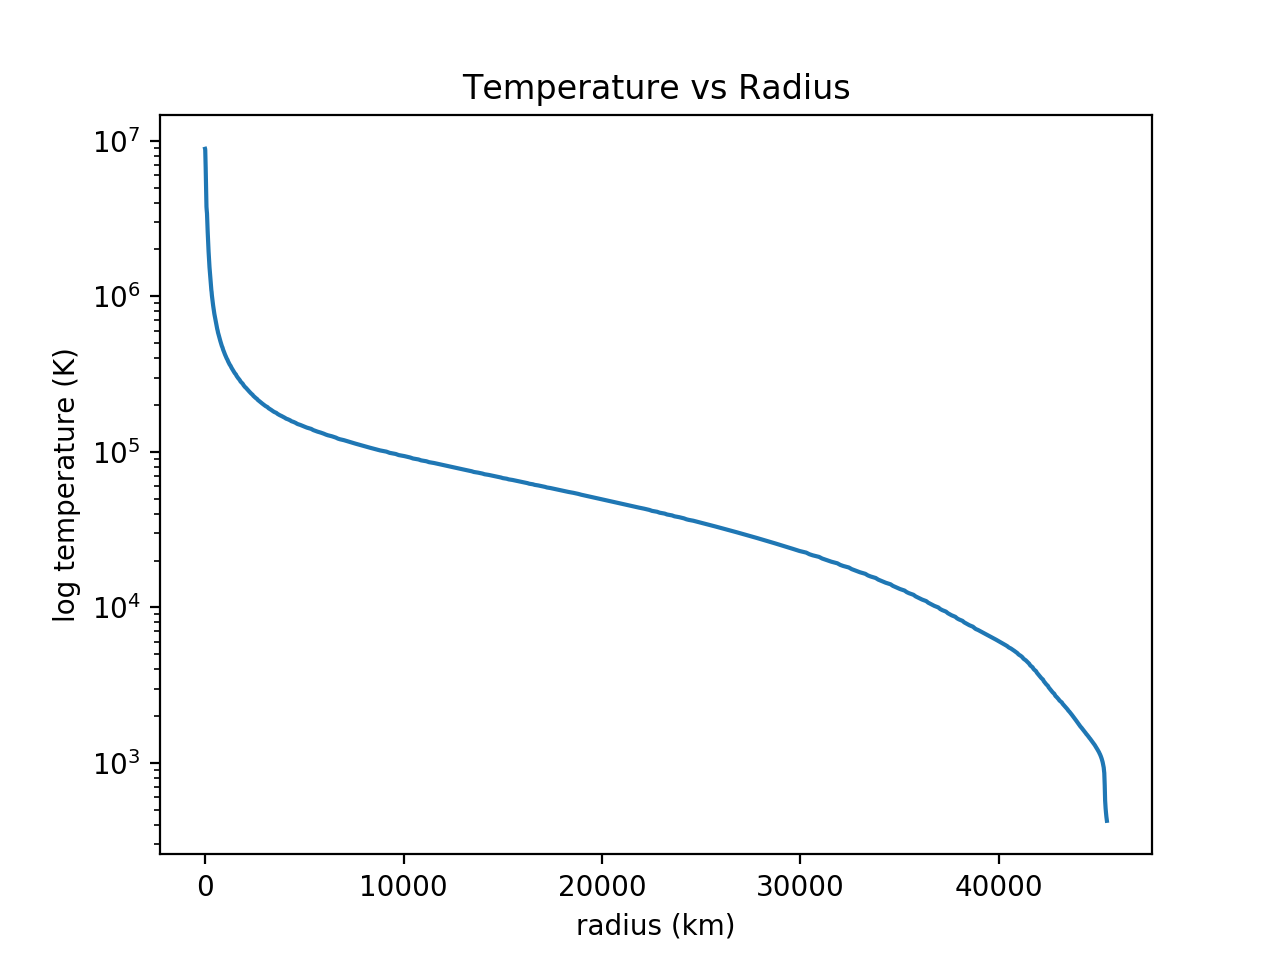

In [117]:
ifig=304;close(ifig);figure(ifig)
plt.plot(rad_km,temp)
plt.title('Temperature vs Radius')
plt.ylabel('log temperature (K)')
plt.xlabel('radius (km)')
plt.yscale('log')

<IPython.core.display.Javascript object>


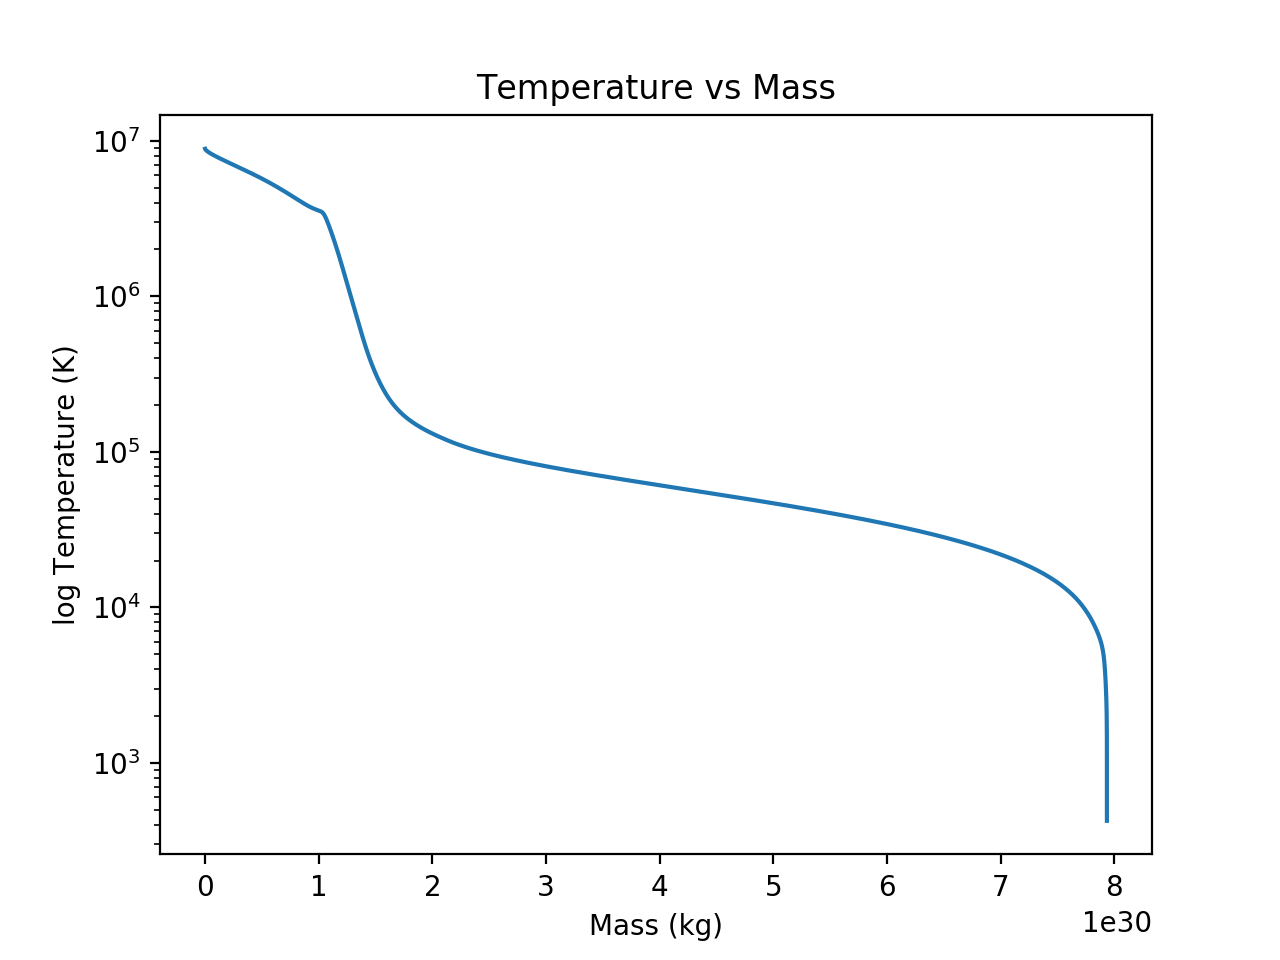

In [118]:
ifig=305;close(ifig);figure(ifig)
plt.plot(mass,temp)
plt.title('Temperature vs Mass')
plt.ylabel('log Temperature (K)')
plt.xlabel('Mass (kg)')
plt.yscale('log')

Everything below this line is extra notes, and parts of the notebook left over from the original star_explore. Use for reference